In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import requests
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import os

In [2]:
# Asignamos el path relativo a la variable dir para utilizarla a la hora de consumir los datasets
# Obtener el path actual
dir = os.getcwd()

In [ ]:
auth_key = 'qCAwvbY5DA4gXfxogObym8FftukU6Ue1TOcH2VCL'

In [ ]:
url = "http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/TOTAL-NACIO-DE-ACCES-48866/?auth_key="+auth_key # Reemplaza con la URL de la API que deseas consultar
response = requests.get(url)
data = response.json()



In [6]:
links = ['https://datosabiertos.enacom.gob.ar/datasets/176155-penetracion-nacional-del-internet-fijo.download/','https://datosabiertos.enacom.gob.ar/datasets/176155-penetracion-del-internet-fijo-por-provincia-accesos-por-cada-100-hogares.download/','https://datosabiertos.enacom.gob.ar/datasets/176153-total-nacional-de-accesos-a-internet-fijo-por-banda-ancha-y-banda-angosta.download/','https://datosabiertos.enacom.gob.ar/datasets/176153-accesos-a-banda-ancha-y-banda-angosta-por-provincia.download/','https://datosabiertos.enacom.gob.ar/datasets/176072-total-nacional-de-accesos-a-internet-fijo-por-tipo-de-tecnologia.download/','https://datosabiertos.enacom.gob.ar/datasets/176072-acceso-a-internet-fijo-por-tecnologia-y-provincia.download/','https://datosabiertos.enacom.gob.ar/datasets/179805-velocidad-media-de-bajada-de-internet-nacional.download/','https://datosabiertos.enacom.gob.ar/datasets/179805-velocidad-media-de-bajada-de-internet-fijo-por-provincia.download/','https://datosabiertos.enacom.gob.ar/datasets/176090-total-nacional-de-accesos-a-internet-fijo-por-velocidad-de-bajada.download/','https://datosabiertos.enacom.gob.ar/datasets/176090-acceso-a-internet-fijo-por-rangos-de-velocidad-de-bajada-y-provincia.download/','https://datosabiertos.enacom.gob.ar/datasets/180149-accesos-a-internet-fijo-por-velocidad-bajada-y-provincia.download/','https://datosabiertos.enacom.gob.ar/datasets/176154-ingresos-por-la-operacion-del-servicio-de-internet-fijo.download/','https://datosabiertos.enacom.gob.ar/datasets/185426-accesos-a-internet-fijo-por-velocidad-de-bajada-y-localidad.download/','https://datosabiertos.enacom.gob.ar/datasets/185537-accesos-a-internet-fijo-por-tecnologia-y-localidad.download/','https://datosabiertos.enacom.gob.ar/datasets/176294-listado-de-localidades-con-conectividad-a-internet.download/','https://datosabiertos.enacom.gob.ar/datasets/176294-conectividad-al-servicio-de-internet.download/']

In [4]:
df_names = ['df_penetracion_nacional_del_internet_fijo','df_penetracion-del-internet-fijo-por-provincia-accesos-por-cada-100-hogares','df_total-nacional-de-accesos-a-internet-fijo-por-banda-ancha-y-banda-angosta','df_accesos-a-banda-ancha-y-banda-angosta-por-provincia','df_total-nacional-de-accesos-a-internet-fijo-por-tipo-de-tecnologia','df_acceso-a-internet-fijo-por-tecnologia-y-provincia','df_velocidad-media-de-bajada-de-internet-nacional','velocidad-media-de-bajada-de-internet-fijo-por-provincia','df_velocidad-media-de-bajada-de-internet-fijo-por-provincia','df_total-nacional-de-accesos-a-internet-fijo-por-velocidad-de-bajada','df_acceso-a-internet-fijo-por-rangos-de-velocidad-de-bajada-y-provincia','df_accesos-a-internet-fijo-por-velocidad-bajada-y-provincia','df_ingresos-por-la-operacion-del-servicio-de-internet-fijo','df_accesos-a-internet-fijo-por-velocidad-de-bajada-y-localidad','df_accesos-a-internet-fijo-por-tecnologia-y-localidad','df_listado-de-localidades-con-conectividad-a-internet','df_conectividad-al-servicio-de-internet']
df_names_final = []
for name in df_names:
    name_modified = name.replace("-", "_")
    df_names_final.append(name_modified)



In [7]:
# Crear variables con los nombres de la lista df_names_final
for link,name in zip(links,df_names_final):
    print(name,link)
    excel = pd.read_excel(link)
    globals()[name] = pd.DataFrame(excel)

df_penetracion_nacional_del_internet_fijo https://datosabiertos.enacom.gob.ar/datasets/176155-penetracion-nacional-del-internet-fijo.download/
df_penetracion_del_internet_fijo_por_provincia_accesos_por_cada_100_hogares https://datosabiertos.enacom.gob.ar/datasets/176155-penetracion-del-internet-fijo-por-provincia-accesos-por-cada-100-hogares.download/
df_total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta https://datosabiertos.enacom.gob.ar/datasets/176153-total-nacional-de-accesos-a-internet-fijo-por-banda-ancha-y-banda-angosta.download/
df_accesos_a_banda_ancha_y_banda_angosta_por_provincia https://datosabiertos.enacom.gob.ar/datasets/176153-accesos-a-banda-ancha-y-banda-angosta-por-provincia.download/
df_total_nacional_de_accesos_a_internet_fijo_por_tipo_de_tecnologia https://datosabiertos.enacom.gob.ar/datasets/176072-total-nacional-de-accesos-a-internet-fijo-por-tipo-de-tecnologia.download/
df_acceso_a_internet_fijo_por_tecnologia_y_provincia https://datosabi

In [8]:
df_penetracion_nacional_del_internet_fijo.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,3,Buenos Aires,26.37
1,2022,3,Capital Federal,50.22
2,2022,3,Catamarca,16.62
3,2022,3,Chaco,11.72
4,2022,3,Chubut,25.86


In [ ]:
df_penetracion_nacional_del_internet_fijo.to_parquet(dir+'/datasets',index=False)

In [ ]:
def graph_progress_access(df):

    # Ordenar el DataFrame por año en orden ascendente
    df.sort_values(by=['Año','Trimestre'], inplace=True)


    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=(15, 6))

    # Iterar sobre las provincias únicas en el DataFrame
    provincias = df['Provincia'].unique()

    for provincia in provincias:
        # Filtrar el DataFrame por provincia
        provincia_df = df[df['Provincia'] == provincia]
        
        # Crear una etiqueta para la línea
        etiqueta = provincia
        
        # Crear el eje x con los trimestres del año
        eje_x = [f"Año {a} Trimestre {t}" for a, t in zip(provincia_df['Año'], provincia_df['Trimestre'])]
        
        # Crear el eje y con los accesos por cada 100 hab
        eje_y = provincia_df['Accesos por cada 100 hab']
        
        # Dibujar la línea
        ax.plot(eje_x, eje_y, label=etiqueta)

    # Establecer el título y las etiquetas de los ejes
    ax.set_title('Progreso de accesos por cada 100 habitantes por provincia')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Accesos por cada 100 hab')

    # Colocar la leyenda fuera del gráfico
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()



In [ ]:
graph_progress_access(df_penetracion_nacional_del_internet_fijo)

In [ ]:
df_penetracion_del_internet_fijo_por_provincia_accesos_por_cada_100_hogares.head()

In [ ]:
df_penetracion_del_internet_fijo_por_provincia_accesos_por_cada_100_hogares.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta.head()

In [ ]:
df_total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta.to_parquet(dir+'/datasets',index=False)

In [10]:
def graph_progress_access_ancha_angosta(df):

    # Ordenar el DataFrame por año en orden ascendente
    df.sort_values(by=['Año','Trimestre'], inplace=True)


    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=(15, 6))

    # Iterar sobre las provincias únicas en el DataFrame
    provincias = df['Provincia'].unique()

    for provincia in provincias:
        # Filtrar el DataFrame por provincia
        provincia_df = df[df['Provincia'] == provincia]
        
        # Crear una etiqueta para la línea
        etiqueta = provincia
        
        # Crear el eje x con los trimestres del año
        eje_x = [f"Año {a} Trimestre {t}" for a, t in zip(provincia_df['Año'], provincia_df['Trimestre'])]
        
        # Crear el eje y con los accesos por cada 100 hab
        eje_y = provincia_df['Total']
        
        # Dibujar la línea
        ax.plot(eje_x, eje_y, label=etiqueta)

    # Establecer el título y las etiquetas de los ejes
    ax.set_title('Progreso de accesos por cada 100 habitantes por provincia')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel('Cantidad de habitantes')

    # Colocar la leyenda fuera del gráfico
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()


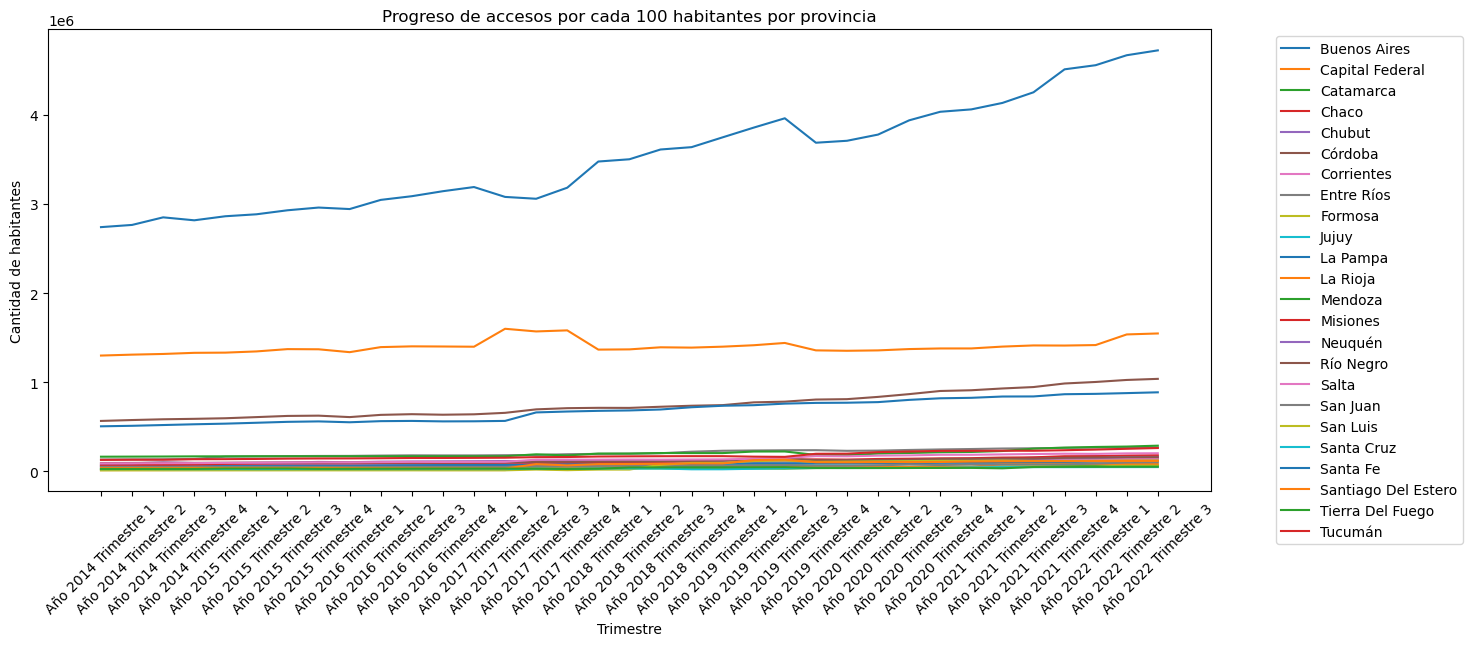

In [11]:
graph_progress_access_ancha_angosta(df_total_nacional_de_accesos_a_internet_fijo_por_banda_ancha_y_banda_angosta)

In [ ]:
df_accesos_a_banda_ancha_y_banda_angosta_por_provincia.head()

In [ ]:
df_accesos_a_banda_ancha_y_banda_angosta_por_provincia.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_total_nacional_de_accesos_a_internet_fijo_por_tipo_de_tecnologia.head()

In [ ]:
df_total_nacional_de_accesos_a_internet_fijo_por_tipo_de_tecnologia.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_acceso_a_internet_fijo_por_tecnologia_y_provincia.head()

In [ ]:
df_acceso_a_internet_fijo_por_tecnologia_y_provincia.to_parquet(dir+'/datasets',index=False)

In [ ]:
velocidad_media_de_bajada_de_internet_fijo_por_provincia.head()

In [ ]:
velocidad_media_de_bajada_de_internet_fijo_por_provincia.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_velocidad_media_de_bajada_de_internet_fijo_por_provincia.head()

In [ ]:
df_velocidad_media_de_bajada_de_internet_fijo_por_provincia.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_total_nacional_de_accesos_a_internet_fijo_por_velocidad_de_bajada.head()

In [ ]:
df_total_nacional_de_accesos_a_internet_fijo_por_velocidad_de_bajada.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.head()

In [ ]:
df_acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.head()

In [ ]:
df_accesos_a_internet_fijo_por_velocidad_bajada_y_provincia.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_ingresos_por_la_operacion_del_servicio_de_internet_fijo.head()

In [ ]:
df_ingresos_por_la_operacion_del_servicio_de_internet_fijo.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad.head()

In [ ]:
df_accesos_a_internet_fijo_por_velocidad_de_bajada_y_localidad.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_accesos_a_internet_fijo_por_tecnologia_y_localidad.head()

In [ ]:
df_accesos_a_internet_fijo_por_tecnologia_y_localidad.to_parquet(dir+'/datasets',index=False)

In [ ]:
df_listado_de_localidades_con_conectividad_a_internet.head()

In [ ]:
df_listado_de_localidades_con_conectividad_a_internet.to_parquet(dir+'/datasets',index=False)